## Classify pictures of cats and dogs
This notebook shows how to **solve the overfitting problem** which is encounter while training the model using some data augmentation.
Demostration of accuracy on both training and validatin example with number of epochs.

### Importing packages

In [3]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import os
import matplotlib.pyplot as plt
import numpy as np


In [0]:
import logging
logger =tf.get_logger()
logger.setLevel(logging.ERROR)

In [7]:
_Link = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
_Dir= tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=_Link,extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [8]:
_Dir_base = os.path.dirname(_Dir)
!find $_Dir_base -type d -print



/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [0]:
base_Dir =os.path.join(os.path.dirname(_Dir), 'cats_and_dogs_filtered')
train_Dir = os.path.join(base_Dir,'train')
validation_Dir = os.path.join(base_Dir,'validation')

train_cats_dir = os.path.join(train_Dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_Dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_Dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_Dir, 'dogs')  # directory with our validation dog pictures


In [10]:
## Number of cats and dogs in training set 
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))

## Number of cats and dogs in validation set
num_cats_vd = len(os.listdir(validation_dogs_dir))
num_dogs_vd = len(os.listdir(validation_dogs_dir))

## Total training example 
totalTrain = num_cats_train + num_dogs_train
## Total validation example
totalValidation = num_cats_vd + num_dogs_vd

print('total training cat images:', num_cats_train)
print('total training dog images:', num_dogs_train)

print('total validation cat images:', num_cats_vd)
print('total validation dog images:', num_dogs_vd)
print("--")
print("Total training images:", totalTrain)
print("Total validation images:", totalValidation)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


### Data modeling 

#### Data preparation
1. Read images from the disk
2. Decode contents of these images and convert it into proper grid format as per their RGB content
3. Convert them into floating point tensors
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

all these tasks can be done using the class **tf.keras.preprocessing.image.ImageDataGenerator**.

In [0]:
BATCH_SIZE = 100 # No. of traning examples to process before updating the model variables
IMG_SIZE = 150 # image width 150 and height 150 pixels

### Data Augmentation
- Apply some random transformation to our training dataset
- We can implement this using `tf.keras` => `ImageDataGenerator` 

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

#plotImages(sample_training_images[:5])  # Plot images 0-4

#### Flipping the training image horizontally 

In [13]:
image_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_Dir,
                                               shuffle=True,
                                               target_size=(IMG_SIZE, IMG_SIZE))

Found 2000 images belonging to 2 classes.


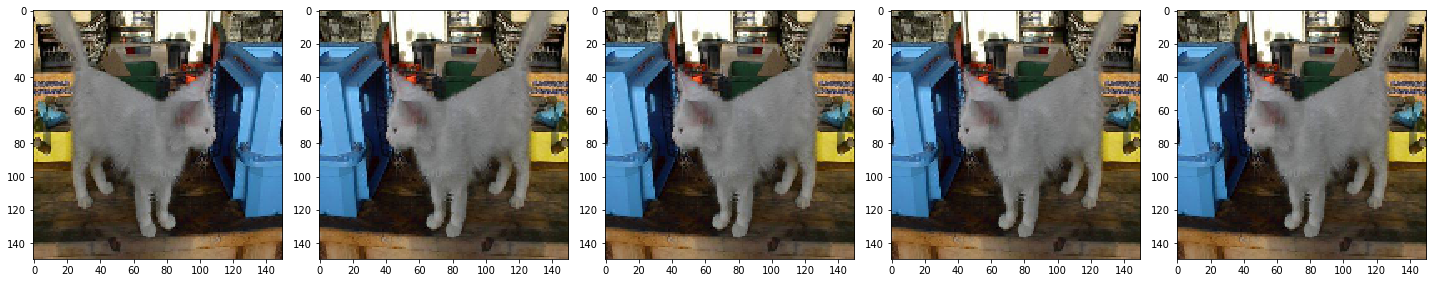

In [14]:
# Testing the transformation 
augmented_image = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_image)

In [0]:
#### Rotating the image

In [16]:
image_gen = ImageDataGenerator(rescale=1./255,rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_Dir,
                                               shuffle=True,
                                               target_size=(IMG_SIZE, IMG_SIZE))

Found 2000 images belonging to 2 classes.


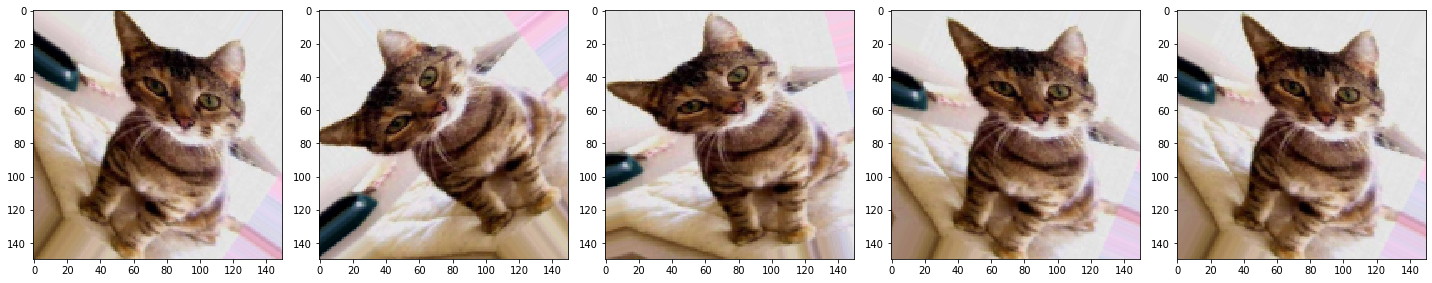

In [17]:
# Testing the transformation 
augmented_image = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_image)

#### Applying zoom to the training images 


In [18]:
image_gen = ImageDataGenerator(rescale=1./255,zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_Dir,
                                               shuffle=True,
                                               target_size=(IMG_SIZE, IMG_SIZE))

Found 2000 images belonging to 2 classes.


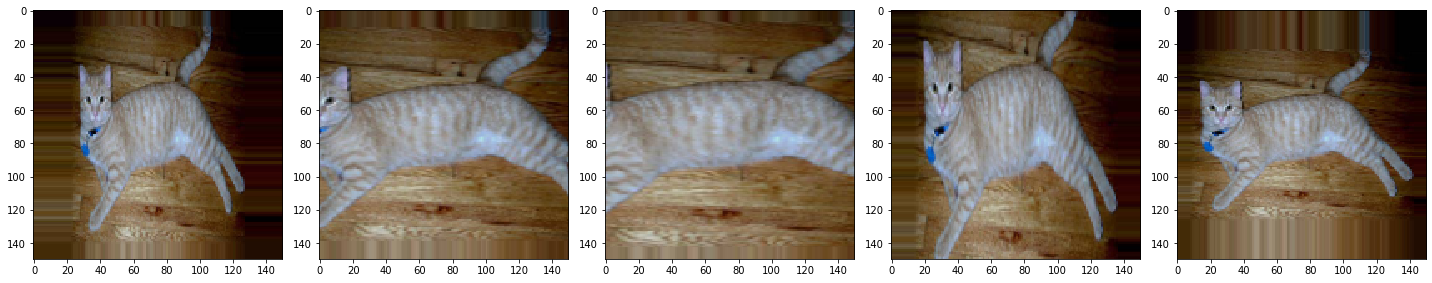

In [19]:
# Testing the transformation 
augmented_image = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_image)

#### Putting everything together

In [20]:
# Here, we have applied rescale, rotation of 45 degrees, 
# width shift, height shift, horizontal flip, and zoom augmentation.
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_Dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SIZE,IMG_SIZE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


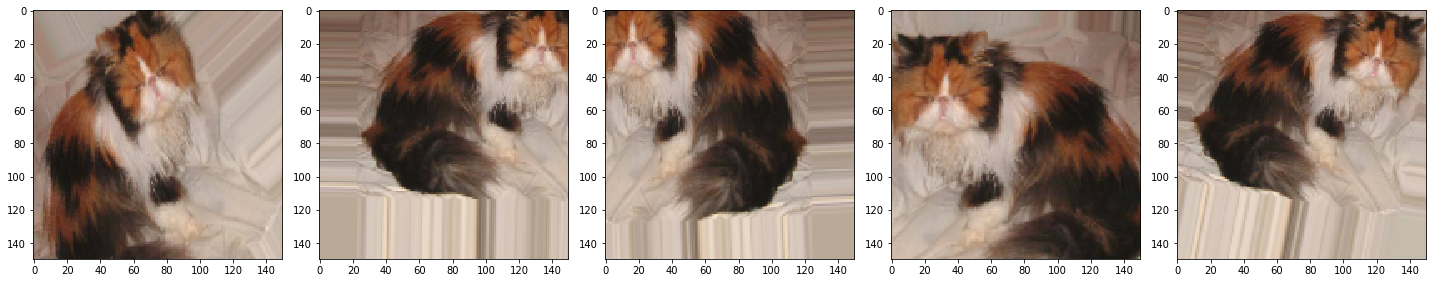

In [21]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

#### Creating Validation set data augmentation.

In [22]:
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory= validation_Dir,
                                                              target_size= (IMG_SIZE,IMG_SIZE), #(150,150)
                                                              shuffle= False,
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


## Creating a model
### Defining a model
- The model will have 4 Convolutional layers with a max pool layer in each of them.
- Before the final Dense layers, we're also applying a **Dropout probability of 0.5** ( It means that 50% of the values coming into the Dropout layer will be set to zero. This helps to **prevent overfitting**.) 
- Then we will have a fully connected layer with 512 units, with a `relu` activation function
- The model will outputs the 2 class as probabilites for two cats and dogs from the `softmax` layer

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5), ## Setting the dropout probability to 50%
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

### Compiling the model

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Model Summary

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## Training the model

In [26]:
%%time
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= int(np.ceil(totalTrain / float(BATCH_SIZE))),
    epochs= EPOCHS,
    validation_data = val_data_gen,
    validation_steps= int(np.ceil(totalValidation/ float(BATCH_SIZE)))
)

Train for 20 steps, validate for 10 steps
Epoch 1/100
20/20 [==============================] - 21s 1s/step - loss: 0.7403 - accuracy: 0.5130 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 16s 793ms/step - loss: 0.6943 - accuracy: 0.4770 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 3/100
20/20 [==============================] - 16s 800ms/step - loss: 0.6912 - accuracy: 0.5005 - val_loss: 0.6834 - val_accuracy: 0.5000
Epoch 4/100
20/20 [==============================] - 16s 791ms/step - loss: 0.6886 - accuracy: 0.5460 - val_loss: 0.6888 - val_accuracy: 0.5870
Epoch 5/100
20/20 [==============================] - 16s 802ms/step - loss: 0.6907 - accuracy: 0.5090 - val_loss: 0.6775 - val_accuracy: 0.5160
Epoch 6/100
20/20 [==============================] - 16s 807ms/step - loss: 0.6764 - accuracy: 0.5710 - val_loss: 0.6844 - val_accuracy: 0.5720
Epoch 7/100
20/20 [==============================] - 16s 808ms/step - loss: 0.6862 - accuracy: 0.

## Visaulizing the results of the training 

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)



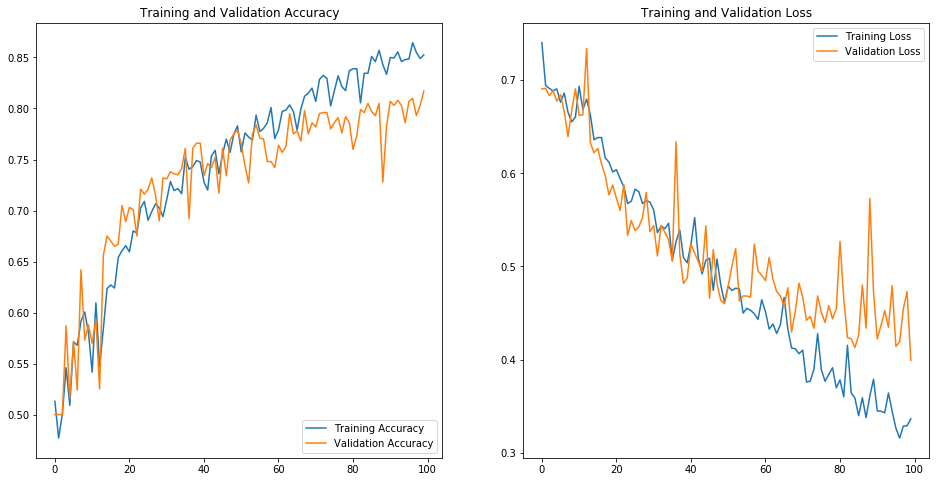

In [29]:
plt.figure(figsize=(16, 8))
# figure 1 Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# figure 2 Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

- We can see that the we have **reduced the overfitting** by very large margin.
- The Training and the validation accuracy is almost same untill 70th epoch.
- The traning and the validation loss does not shows much variation until 70th epoch.